In [98]:
import numpy as np
from collections import Counter
from PQmodel import PQ,build_data
from seaborn import heatmap
import numpy as np
import matplotlib.pyplot as plt


In [99]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [114]:
# Crear un modelo secuencial
model = Sequential()

# Agregar una capa de convolución 1D
model.add(Conv1D(filters = 256, kernel_size=16, activation='relu', input_shape=(64, 1),padding='same'))

# Agregar una capa de pooling 1D
model.add(MaxPooling1D(pool_size=4))

# Agregar otra capa de convolución 1D y pooling
model.add(Conv1D(filters = 128, kernel_size=9, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Agregar otra capa de convolución 1D y pooling
model.add(Conv1D(filters = 64, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Agregar otra capa de convolución 1D y pooling
model.add(Conv1D(filters = 32, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters = 16, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Aplanar la salida
model.add(Flatten())

# Agregar capas totalmente conectadas
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 29, activation='softmax'))  # 29 clases, activación softmax para clasificación multiclase

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 64, 256)           4352      
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 16, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_29 (Conv1D)          (None, 16, 128)           295040    
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 8, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_30 (Conv1D)          (None, 8, 64)             24640     
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 4, 64)           

In [105]:
Prueba = PQ(Cicles=1,PeriodoDisturbio=1,InicioDisturbio=0,FS=3841)

In [106]:
datos = Prueba.PQaleatorio(10000)
datos.shape

(10000, 29, 64)

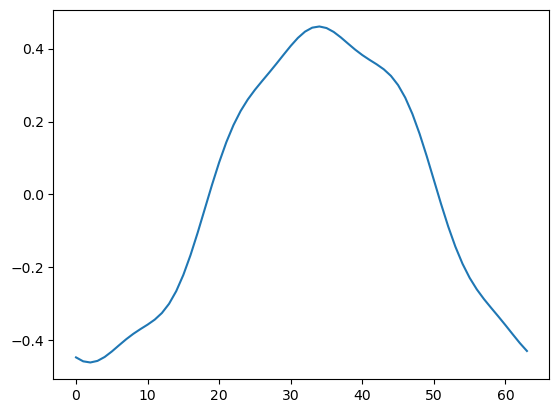

In [107]:
plt.plot(datos[0,7])
plt.show()

In [109]:
datos.shape

(10000, 29, 64)

In [111]:
dd,target=build_data(datos,cs=64)

In [112]:
target.shape
dd.shape

(290000, 64)

In [115]:
Training = model.fit(dd,target,epochs=100,batch_size = 100)#,batch_size = 100

Epoch 1/100
2900/2900 [==============================] - 49s 17ms/step - loss: 1.1149 - accuracy: 0.5101
Epoch 2/100
2900/2900 [==============================] - 47s 16ms/step - loss: 0.7647 - accuracy: 0.6083
Epoch 3/100
2900/2900 [==============================] - 47s 16ms/step - loss: 0.6798 - accuracy: 0.6394
Epoch 4/100
2900/2900 [==============================] - 47s 16ms/step - loss: 0.6266 - accuracy: 0.6655
Epoch 5/100
2900/2900 [==============================] - 47s 16ms/step - loss: 0.5890 - accuracy: 0.6900
Epoch 6/100
2900/2900 [==============================] - 47s 16ms/step - loss: 0.5422 - accuracy: 0.7217
Epoch 7/100
2900/2900 [==============================] - 47s 16ms/step - loss: 0.4958 - accuracy: 0.7495
Epoch 8/100
2900/2900 [==============================] - 47s 16ms/step - loss: 0.4685 - accuracy: 0.7644
Epoch 9/100
2900/2900 [==============================] - 47s 16ms/step - loss: 0.4434 - accuracy: 0.7787
Epoch 10/100
2900/2900 [==============================]

In [116]:
model.save("modelo_cnn1C.h5")

In [117]:
datosp = Prueba.PQaleatorio(1)

In [119]:
ddp,targetp=build_data(datosp,cs=64)

In [120]:
resultado=model.predict(ddp)

1/1 [==============================] - 0s 106ms/step


In [121]:
senal=20
print(list(resultado[senal]).index(np.max(resultado[senal])))

20
